# Outline
- [1 - Importing the required Library and Packages](#1)
- [2 - Target Variable Distibution](#2)
- [3 - Summary of Unknown Data](#3)
- [4 - Bar Chart showing Damage Distribution](#4)
- [5 Univariate Analysis](#5)
- [6 - Correlation Plot with Target Variable](#6)
- [7 - BiVariate Analysis](#7)
  - [7.1 - Analyzing Relationship of VegClearan with Damage](#7.1)
  - [7.2 - Analyzing Relationship of StructureT_Standardized with Damage](#7.2)
  - [7.3 - Analyzing Relationship of County with Damage](#7.3)
  - [7.4 - BoxPLot of Claim with Damage](#.4)
  - [7.5 - Relatonship of RoofConstr with Damage](#7.5)
  - [7.6 - Relationship of ExteriorSI with Damage](#10.6)
  - [7.7 - Relationship of Topography with Damage](#7.7)
  - [7.8 - Relationship of WindowPane with Damage](#7.8)
- [8 - Year Built and Damage Analysis](#8)
  - [8.1 BoxPlot](#8.1)
- [9 - GroupBy Analysis with respect to Damage](#9)
- [10 - Feature Engineering](#10)
- [11 - Exporting the feature dataframe for model training](#11)

<a name="1"></a>
## 1 - Importing the required Library and Packages

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# Disable scientific notation for pandas
# pd.options.display.float_format = '{:.2f}'.format
cali_wildfire_data = pd.read_csv('csv_data/cali_wildfire_filled_address_df_with_community_topography_cleaned.csv')
data = pd.read_csv('csv_data/cali_wildfire_filled_address_df_with_community_topography_cleaned.csv')

<a name="2"></a>
## 2 - Target Variable Distibution

In [141]:
target_analysis = pd.DataFrame({
    'DAMAGE':cali_wildfire_data['DAMAGE'].value_counts(),
    'Percentage':((cali_wildfire_data['DAMAGE'].value_counts()/len(cali_wildfire_data)) * 100)
    
})
target_analysis

,DAMAGE,Percentage
DAMAGE,,
Destroyed (>50%),29367,92.739847
Affected (1-9%),1256,3.966399
No Damage,573,1.809512
Minor (10-25%),310,0.978968
Major (26-50%),160,0.505274


<a name="3"></a>
## 3 - Summary of Unknown Data

In [142]:
Unknown_count = (cali_wildfire_data == 'Unknown').sum()
Unknown_count = Unknown_count[Unknown_count > 1]

Unknown_count

COMMUNITY        58
VEGCLEARAN     3401
ROOFCONSTR     1752
EAVES         13885
VENTSCREEN     9420
EXTERIORSI     1870
WINDOWPANE     6787
TOPOGRAPHY      144
YEARBUILT      7294
dtype: int64

<a name="4"></a>
## 4 - Distribution of Damage Category

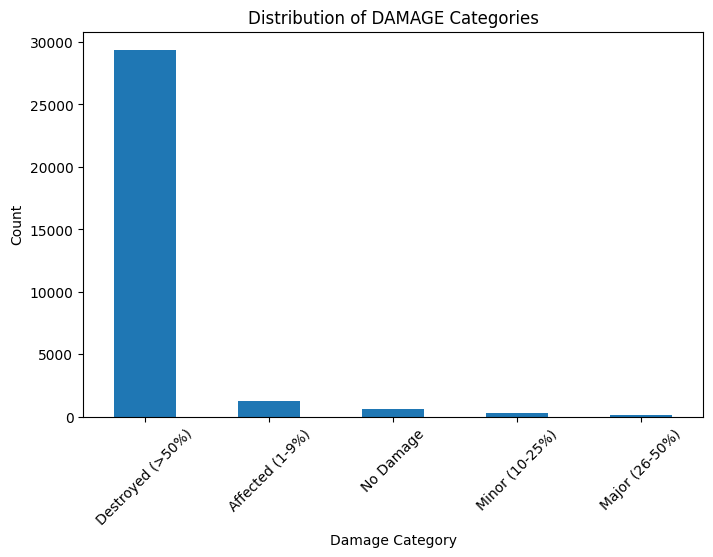

In [143]:
# Distribution of the target variable `DAMAGE`
damage_distribution = cali_wildfire_data['DAMAGE'].value_counts()

# Plotting target distribution
plt.figure(figsize=(8, 5))
damage_distribution.plot(kind='bar', title="Distribution of DAMAGE Categories")
plt.xlabel("Damage Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


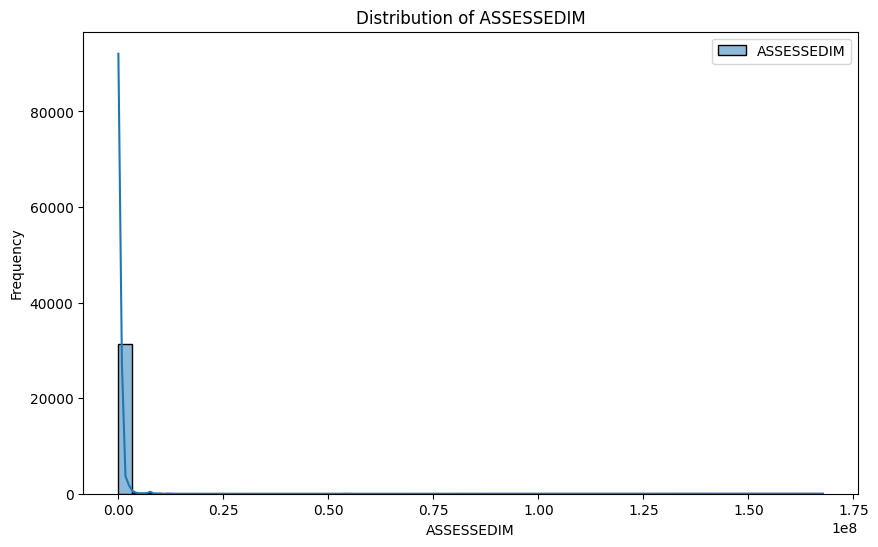

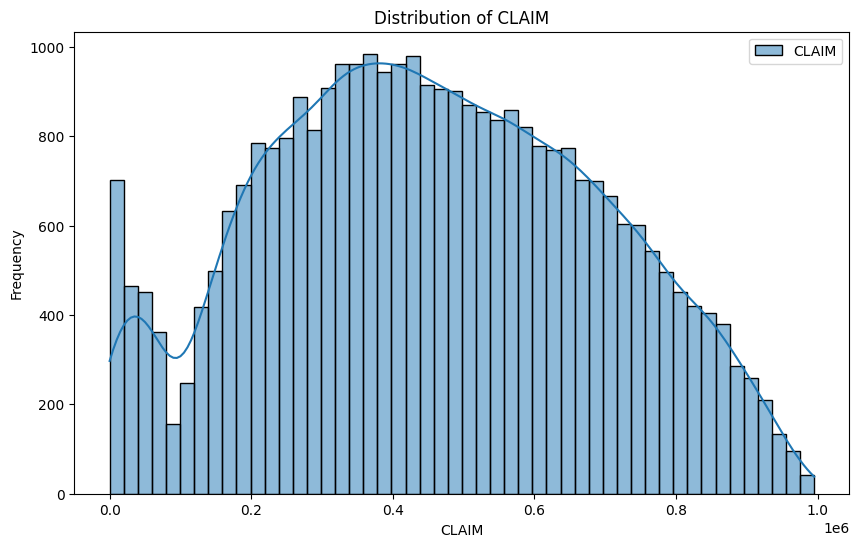

In [144]:
# Analyze numerical features
numerical_columns = cali_wildfire_data[['ASSESSEDIM', 'CLAIM']]

# Plotting distributions of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(cali_wildfire_data[col], kde = True, bins=50,label=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [145]:
# 3. Detect and treat outliers in numerical columns
# Using IQR for `CLAIM` and `ASSESSEDIM`
def treat_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

data['CLAIM_Treated'] = treat_outliers_iqr(cali_wildfire_data['CLAIM'])
data['ASSESSEDIM_Treated'] = treat_outliers_iqr(cali_wildfire_data['ASSESSEDIM'])

# 4. Normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = ['CLAIM_Treated', 'ASSESSEDIM_Treated']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data_cleaned_description = data.describe()
data_cleaned_description


,ASSESSEDIM,LONGITUDE,LATITUDE,CLAIM,CLAIM_Treated,ASSESSEDIM_Treated
count,3.166600e+04,31666.000000,31666.000000,31666.000000,31666.000000,31666.000000
mean,4.234330e+05,-121.743066,39.019302,456105.517614,0.458280,0.338573
std,2.774841e+06,0.906542,1.407049,232838.834664,0.233949,0.312486
min,0.000000e+00,-123.303945,34.008132,0.000000,0.000000,0.000000
25%,7.254800e+04,-122.477385,38.491596,279863.535000,0.281198,0.109326
50%,1.467125e+05,-121.610085,39.744586,447689.535000,0.449824,0.221087
75%,3.089670e+05,-121.585612,39.770729,633230.535000,0.636249,0.465595
max,1.677310e+08,-118.664365,39.853148,995255.530000,1.000000,1.000000


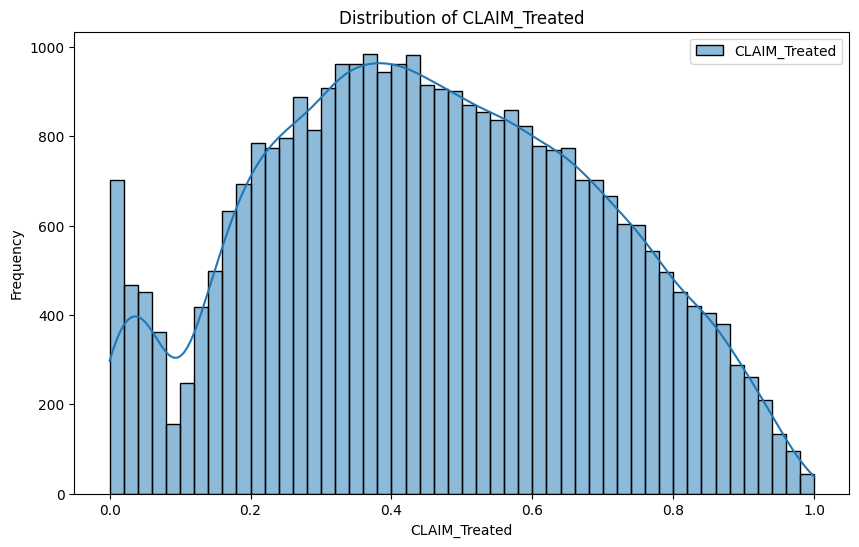

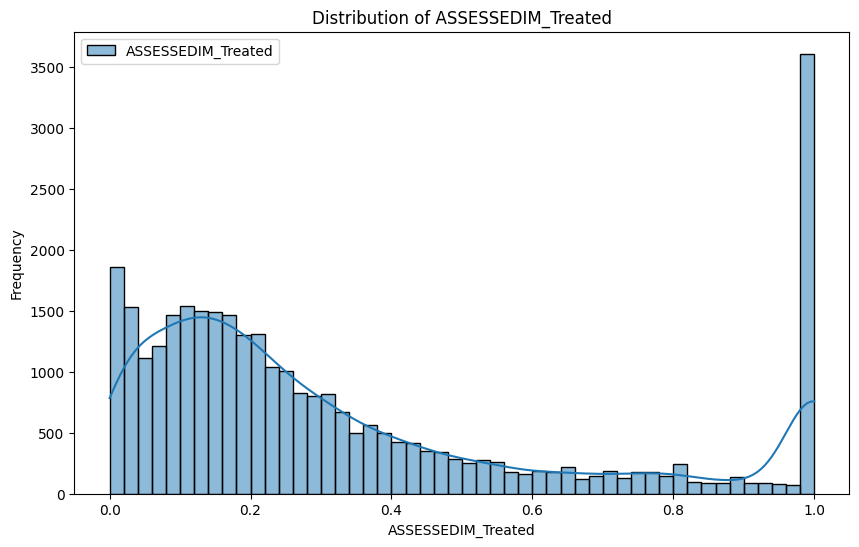

In [146]:
# Analyze numerical features
numerical_columns = data[['CLAIM_Treated', 'ASSESSEDIM_Treated']]

# Plotting distributions of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde = True, bins=50,label=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

<a name="5"></a>
## 5 - Univariate Analysis


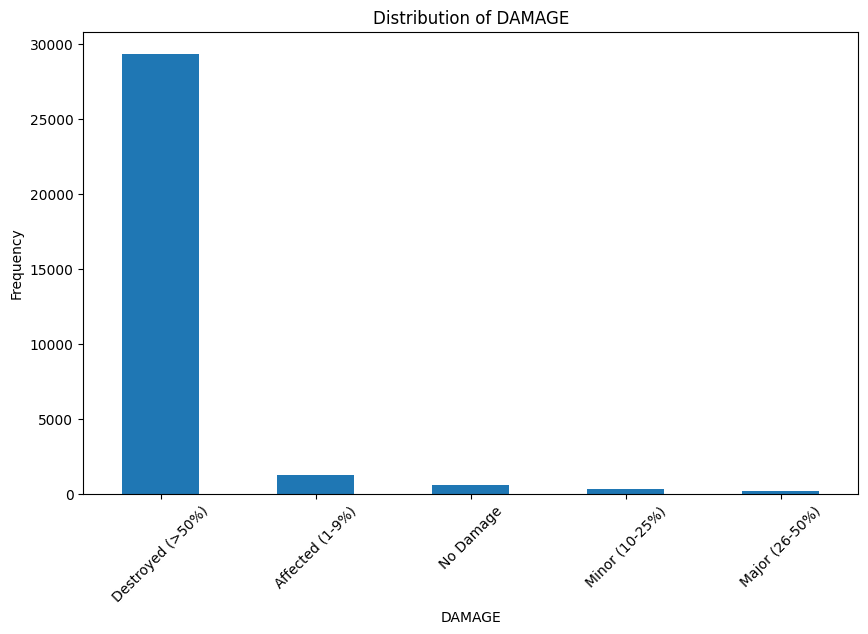

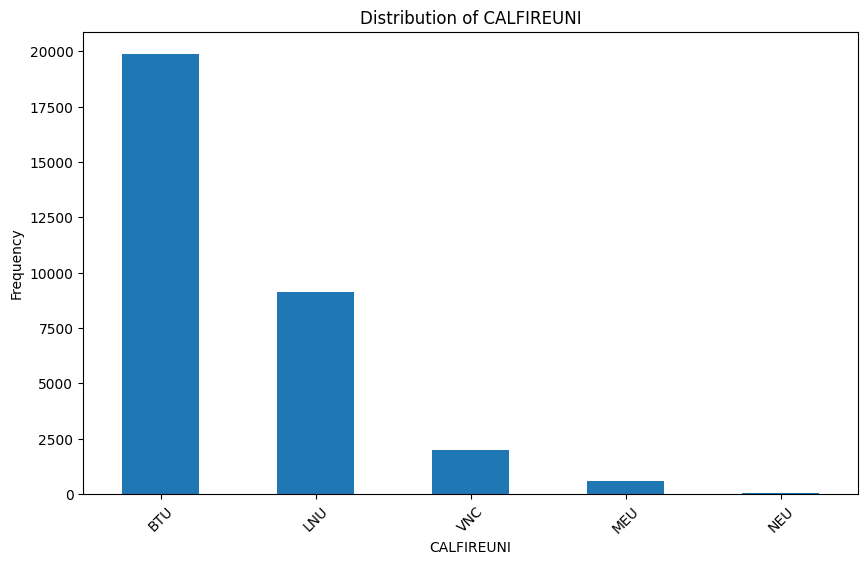

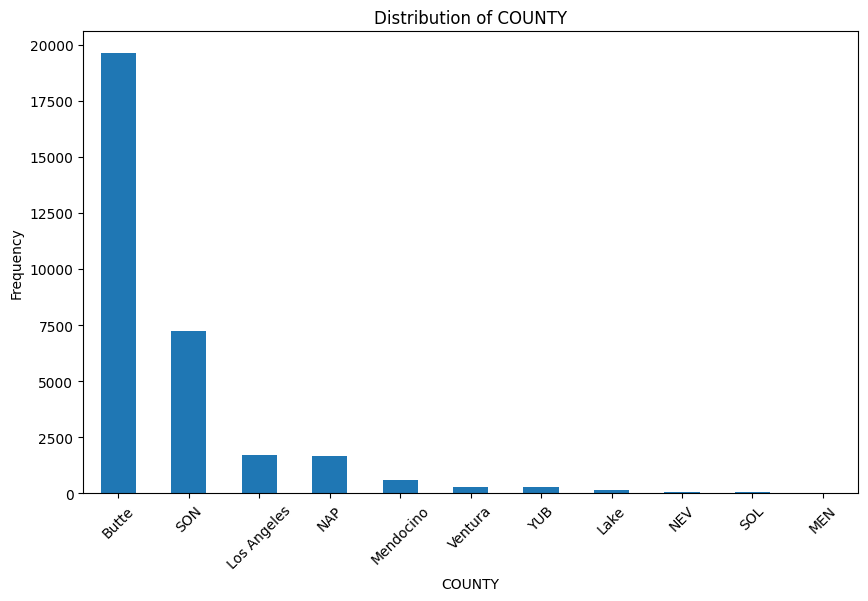

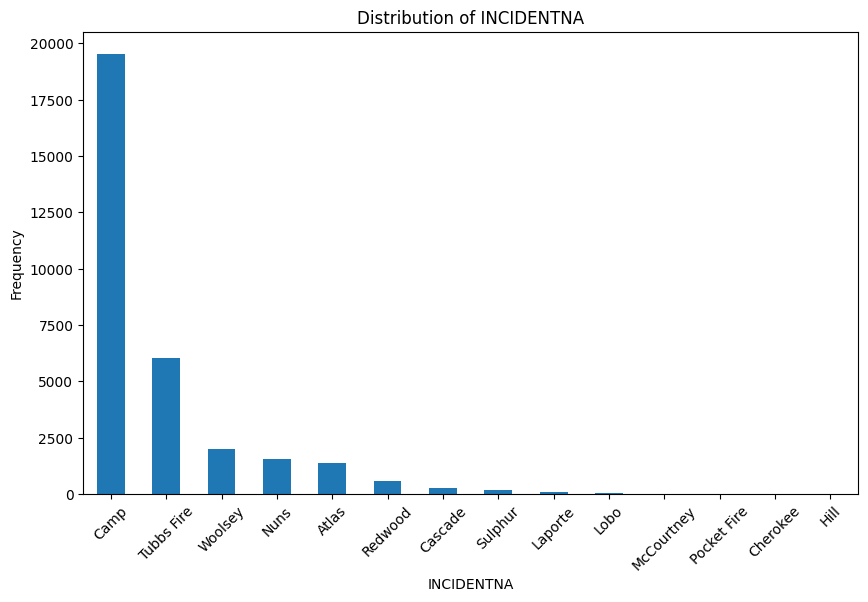

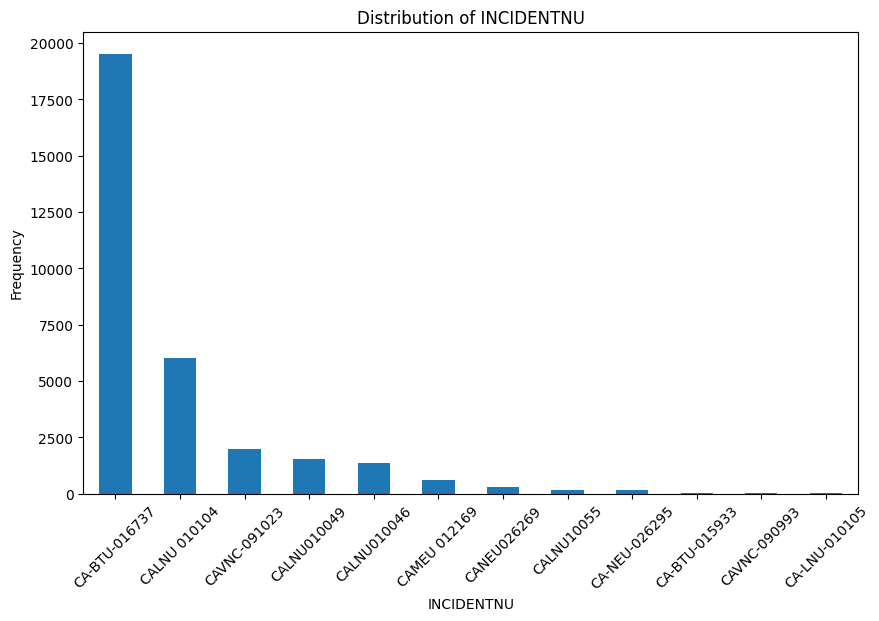

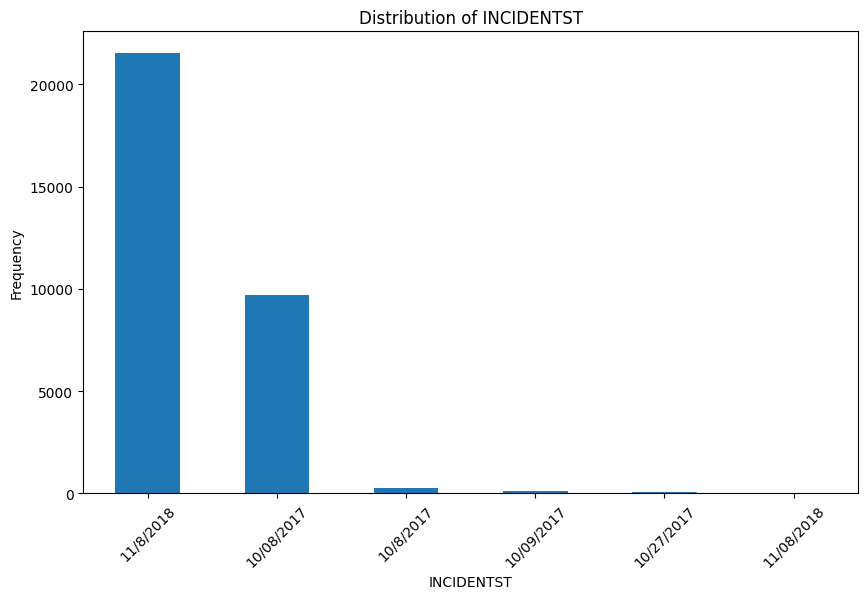

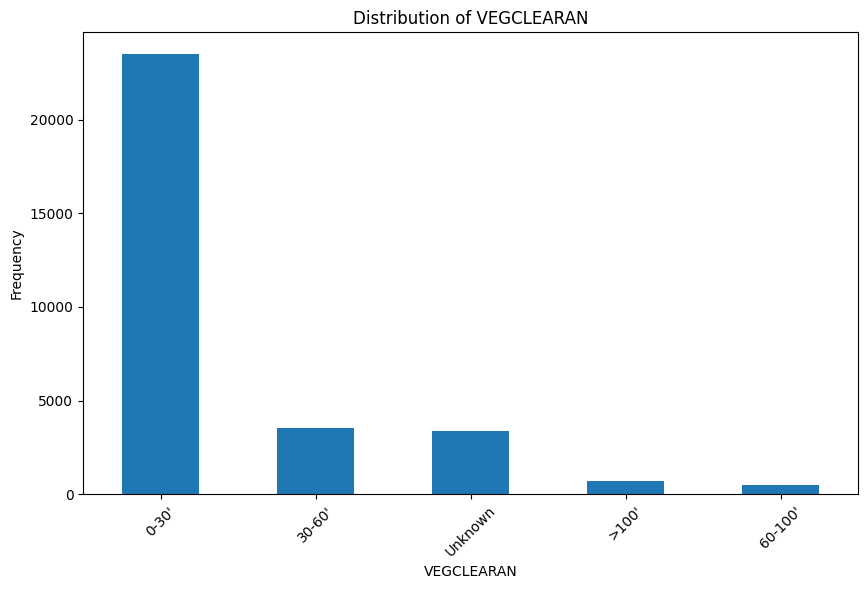

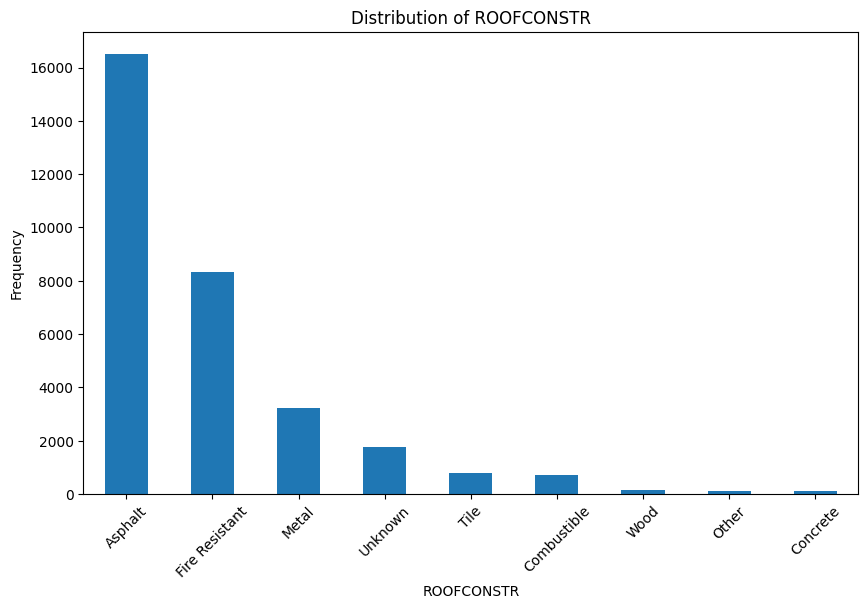

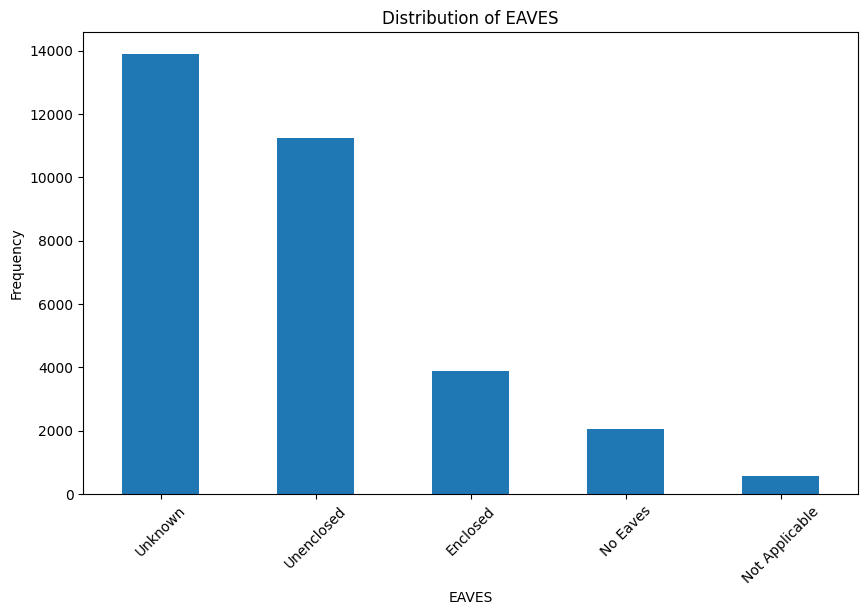

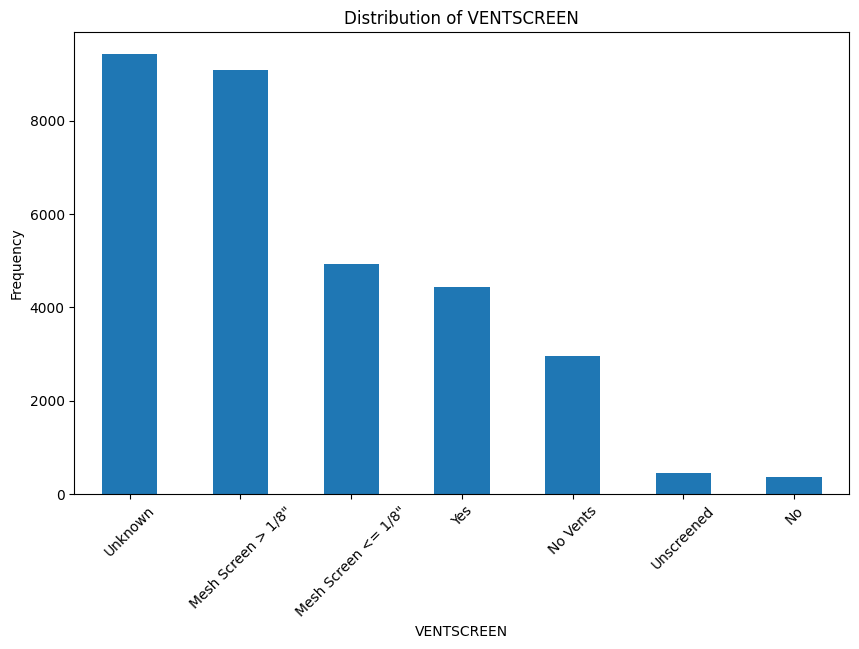

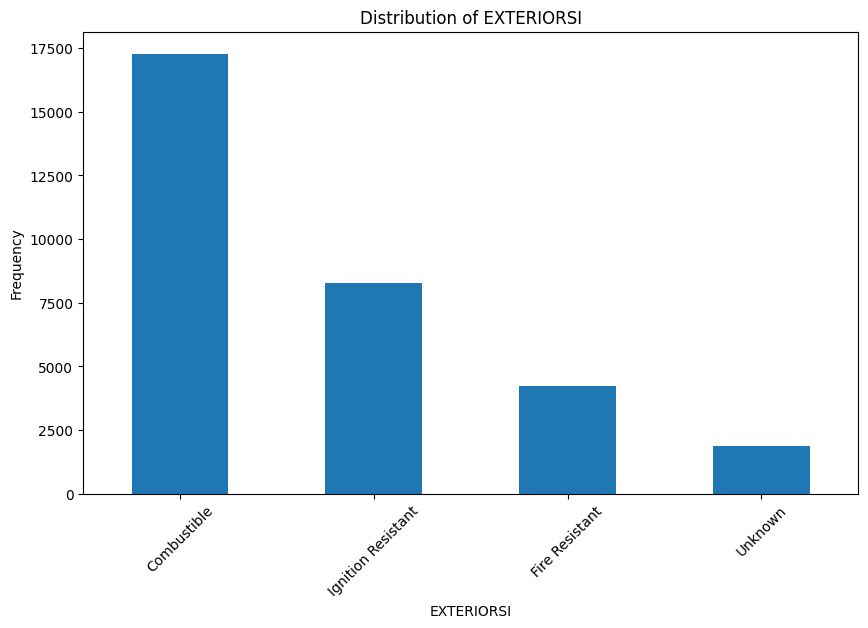

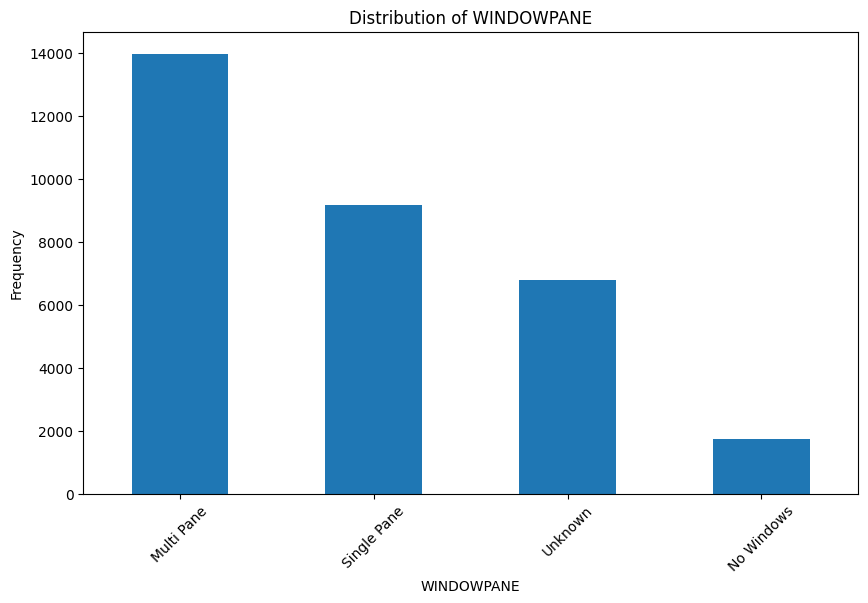

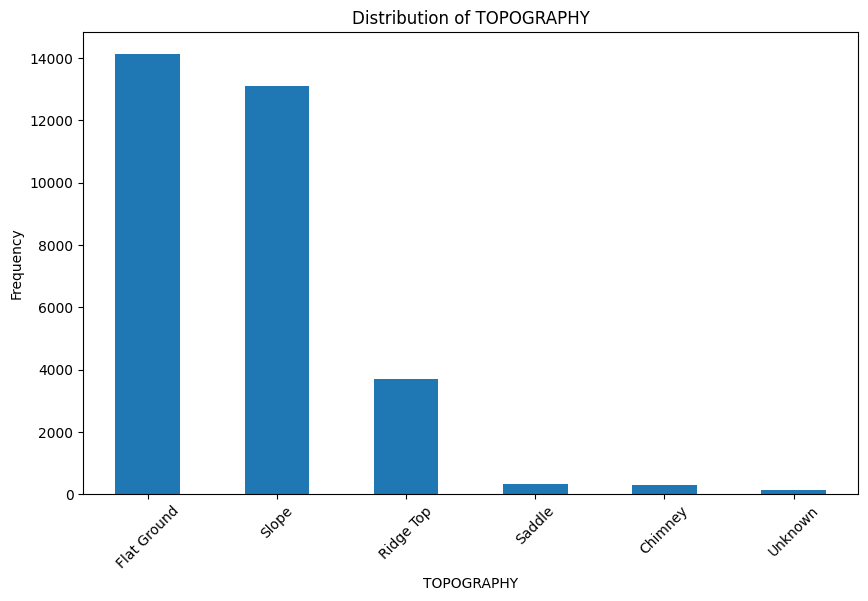

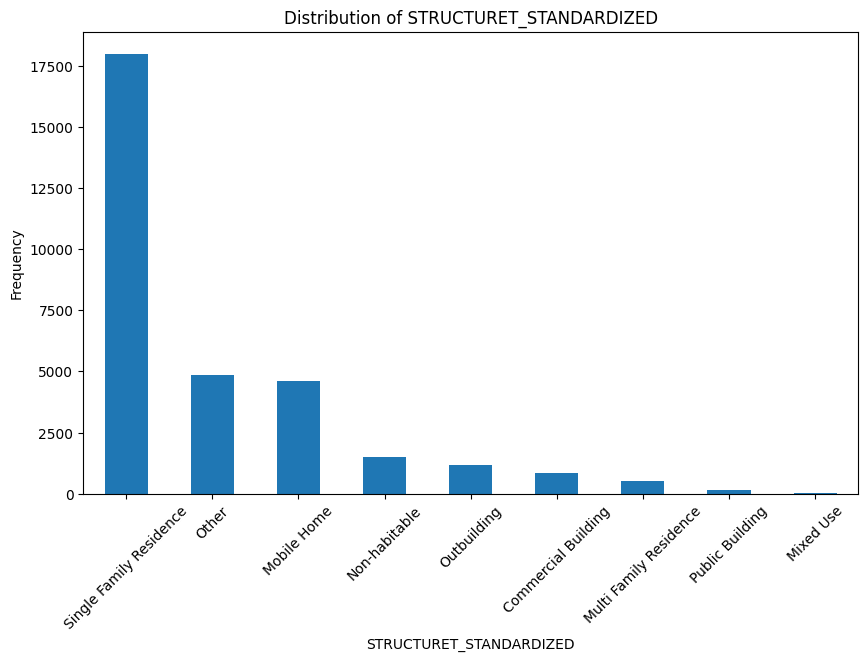

In [147]:
# Analyze categorical features
categorical_columns = cali_wildfire_data.select_dtypes(include=['object']).columns

# Plot distributions for categorical columns
for col in categorical_columns:
    if cali_wildfire_data[col].nunique() < 20:  # Plot only for columns with fewer unique values for readability
        plt.figure(figsize=(10, 6))
        cali_wildfire_data[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)
        plt.show()


<a name="6"></a>
## 6 - Correlation Plot with DAMAGE

In [148]:
cali_wildfire_data['STRUCTURET_STANDARDIZED'].value_counts()

STRUCTURET_STANDARDIZED
Single Family Residence    17983
Other                       4868
Mobile Home                 4613
Non-habitable               1504
Outbuilding                 1190
Commercial Building          831
Multi Family Residence       519
Public Building              140
Mixed Use                     18
Name: count, dtype: int64

In [149]:
data_corr = cali_wildfire_data.copy()
data = cali_wildfire_data.copy()

In [150]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['DAMAGE', 'CITY', 'CALFIREUNI', 'COUNTY', 'COMMUNITY', 
                   'INCIDENTNA', 'INCIDENTNU', 'INCIDENTST', 'VEGCLEARAN',
                   'STRUCTURET', 'ROOFCONSTR', 'VENTSCREEN', 'EAVES',
                   'EXTERIORSI', 'WINDOWPANE', 'TOPOGRAPHY']

# Handle numeric columns first
numeric_cols = ['ASSESSEDIM', 'CLAIM', 'YEARBUILT', 'LONGITUDE', 'LATITUDE']

# Step 1: Clean and process numeric columns
try:
    # Remove any non-numeric characters and convert to numeric
    for col in numeric_cols:
        if col in data_corr.columns:
            data_corr[col] = pd.to_numeric(data_corr[col].astype(str).str.replace('$', '').str.replace(',', ''), errors='coerce')
    print("Numeric columns processed successfully.")
except Exception as e:
    print(f"Error processing numeric columns: {e}")

# Step 2: Process categorical columns with LabelEncoder
try:
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        if col in data_corr.columns:
            data_corr[col] = label_encoder.fit_transform(data_corr[col].astype(str))
    print("Categorical columns processed successfully.")
except Exception as e:
    print(f"Error processing categorical columns: {e}")

# Step 3: Generate and display the correlation matrix
try:
    correlation_matrix = data_corr.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Matrix of Processed Data')
    plt.show()
    print("Correlation matrix generated successfully.")
except Exception as e:
    print(f"Error generating correlation matrix: {e}")


Numeric columns processed successfully.
Categorical columns processed successfully.
Error generating correlation matrix: could not convert string to float: 'Mobile Home'


<a name="7"></a>
## 7 - BiVariate Analysis

<a name="7.1"></a>
### 7.1 - Analyzing Relationship of VegClearan with Damage 

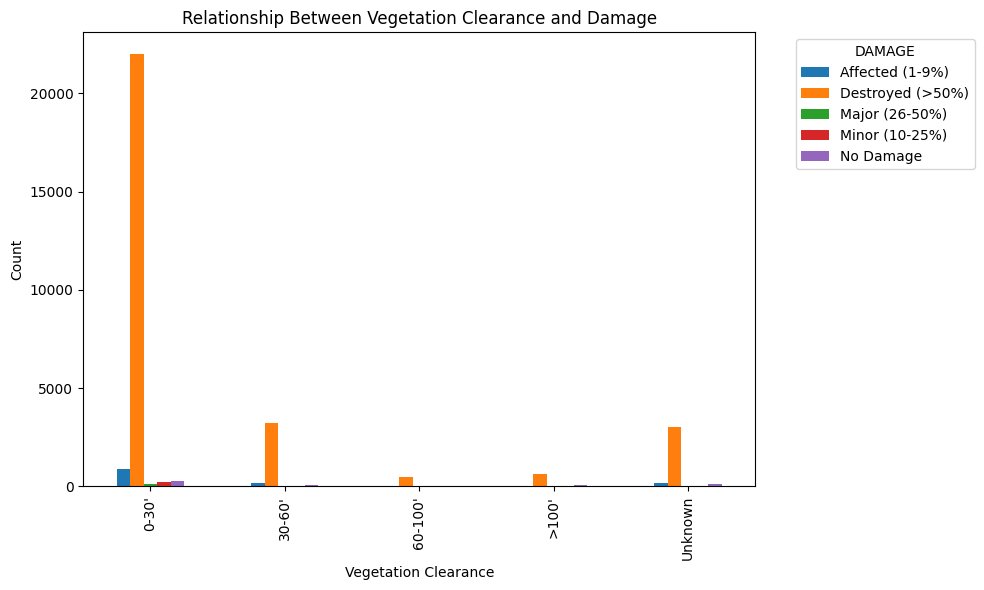

In [151]:
# Analyzing the relationship between VEGCLEARAN (Vegetation Clearance) and DAMAGE
vegclearan_damage = cali_wildfire_data.groupby(['VEGCLEARAN', 'DAMAGE']).size().unstack().fillna(0)

# Plot the distribution of VEGCLEARAN vs DAMAGE
vegclearan_damage.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Relationship Between Vegetation Clearance and Damage')
plt.ylabel('Count')
plt.xlabel('Vegetation Clearance')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<a name="7.2"></a>
### 7.2 - Analyzing Relationship of StructureT_Standardized with Damage 

In [152]:
cali_wildfire_data.groupby(['STRUCTURET_STANDARDIZED', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
STRUCTURET_STANDARDIZED,,,,,
Single Family Residence,815.0,16602.0,52.0,158.0,356.0
Other,123.0,4653.0,37.0,48.0,7.0
Mobile Home,75.0,4517.0,7.0,11.0,3.0
Non-habitable,55.0,1295.0,20.0,34.0,100.0
Outbuilding,46.0,1070.0,17.0,16.0,41.0
Commercial Building,90.0,682.0,13.0,25.0,21.0
Multi Family Residence,35.0,438.0,11.0,12.0,23.0
Public Building,15.0,95.0,3.0,5.0,22.0
Mixed Use,2.0,15.0,NaN,1.0,NaN


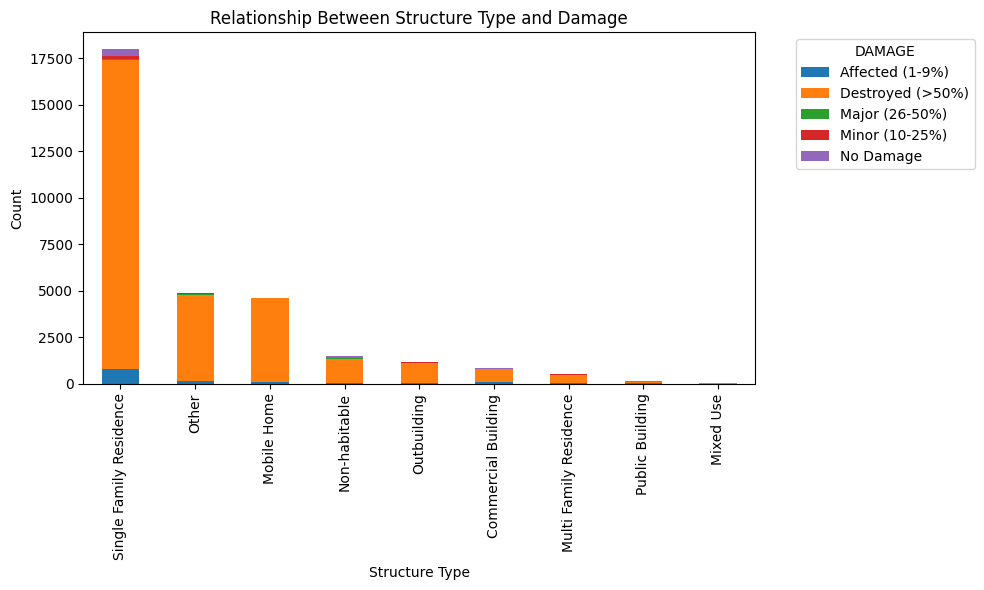

In [153]:
# Analyzing the relationship between STRUCTURET (Structure Type) and DAMAGE
structuret_damage = cali_wildfire_data.groupby(['STRUCTURET_STANDARDIZED', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False).fillna(0)

# Plot the distribution of STRUCTURET vs DAMAGE
structuret_damage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relationship Between Structure Type and Damage')
plt.ylabel('Count')
plt.xlabel('Structure Type')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<a name="7.3"></a>
### 7.3 - Analyzing Relationship of County with Damage 

<Figure size 1200x600 with 0 Axes>

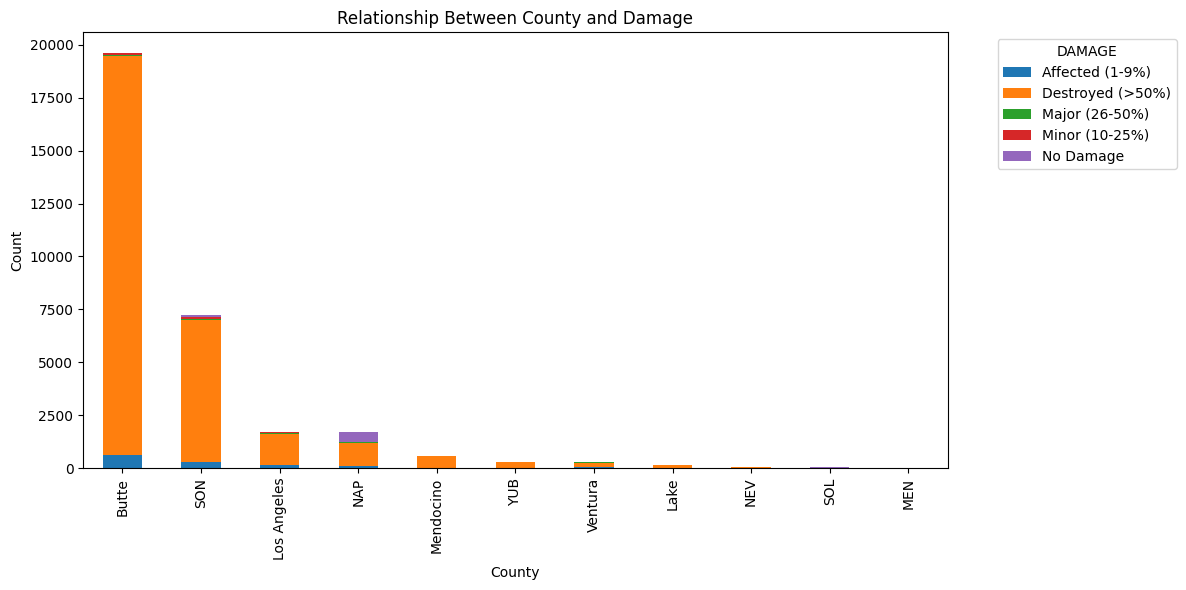

In [154]:
# Set a general figure size for better visualization
plt.figure(figsize=(12, 6))

# 1. Relationship between COUNTY and DAMAGE
county_damage = cali_wildfire_data.groupby(['COUNTY', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False).fillna(0)
county_damage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship Between County and Damage')
plt.ylabel('Count')
plt.xlabel('County')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<a name="7.4"></a>
### 7.4 - BoxPLot of Claim with Damage 

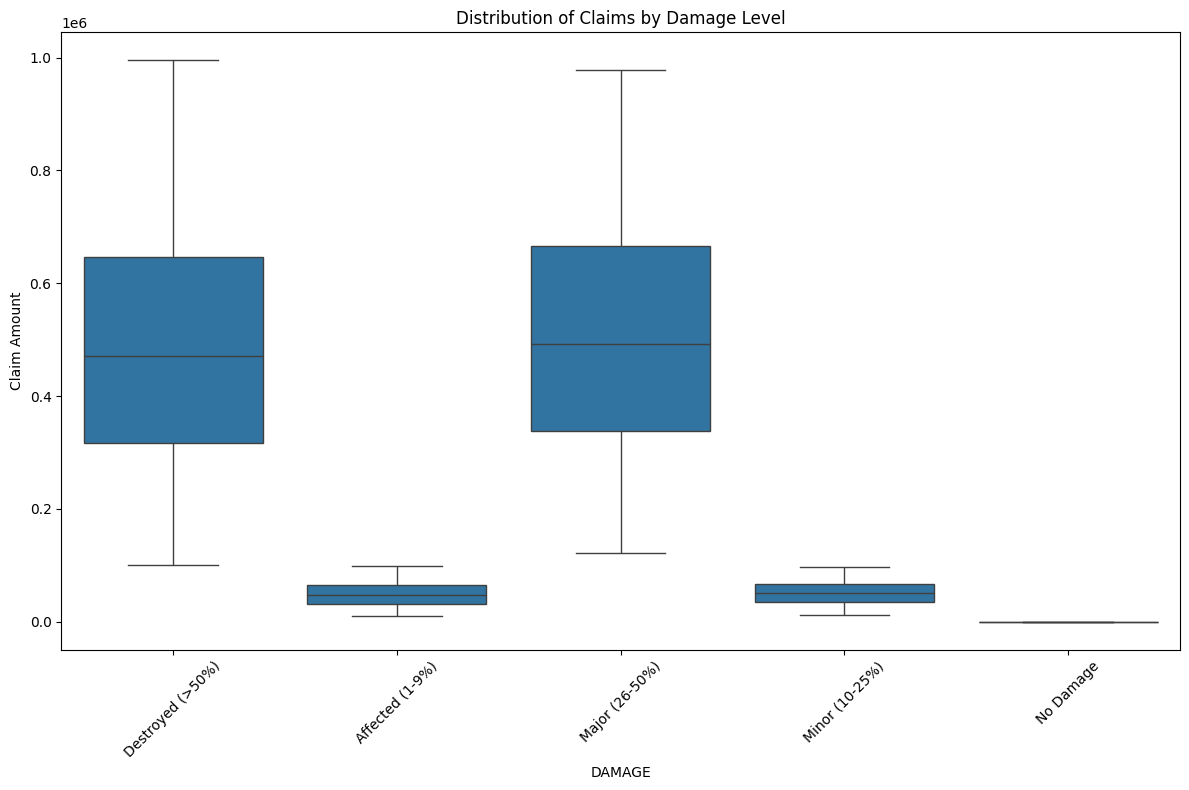

In [155]:
# 2. Boxplot of CLAIM by DAMAGE
plt.figure(figsize=(12, 8))
sns.boxplot(data=cali_wildfire_data, x='DAMAGE', y='CLAIM')
plt.title('Distribution of Claims by Damage Level')
plt.ylabel('Claim Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<a name="7.5"></a>
### 7.5 - Relatonship of RoofConstr with Damage 

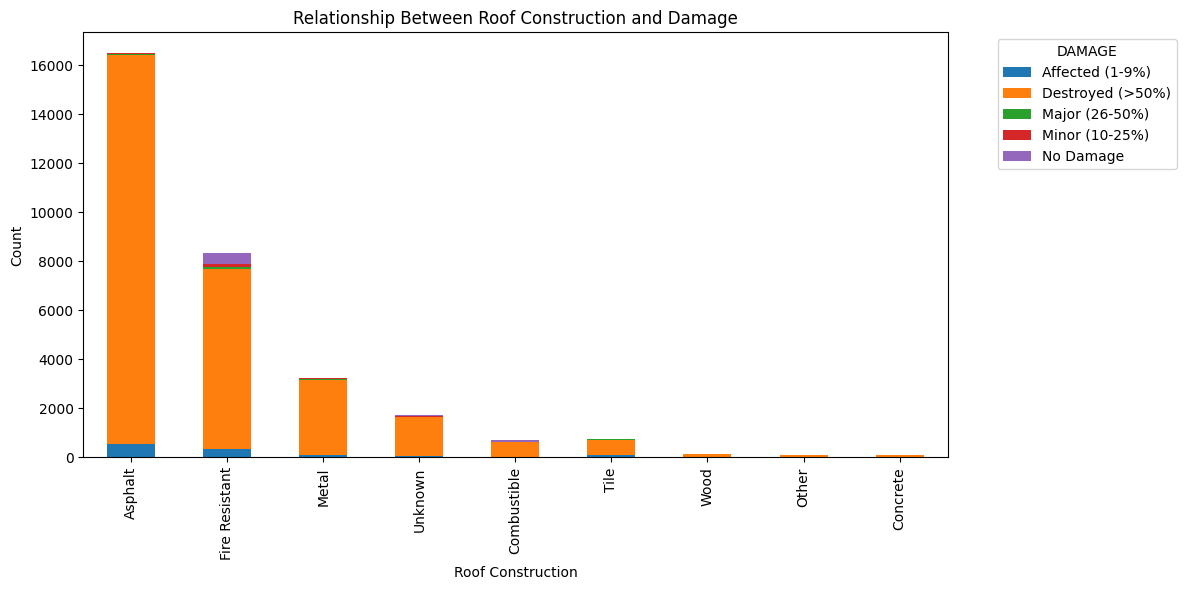

In [156]:
# Relationship between ROOFCONSTR and DAMAGE
roofconstr_damage = cali_wildfire_data.groupby(['ROOFCONSTR', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False).fillna(0)
roofconstr_damage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship Between Roof Construction and Damage')
plt.ylabel('Count')
plt.xlabel('Roof Construction')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<a name="7.6"></a>
### 7.6 - Relationship of ExteriorSI with Damage 

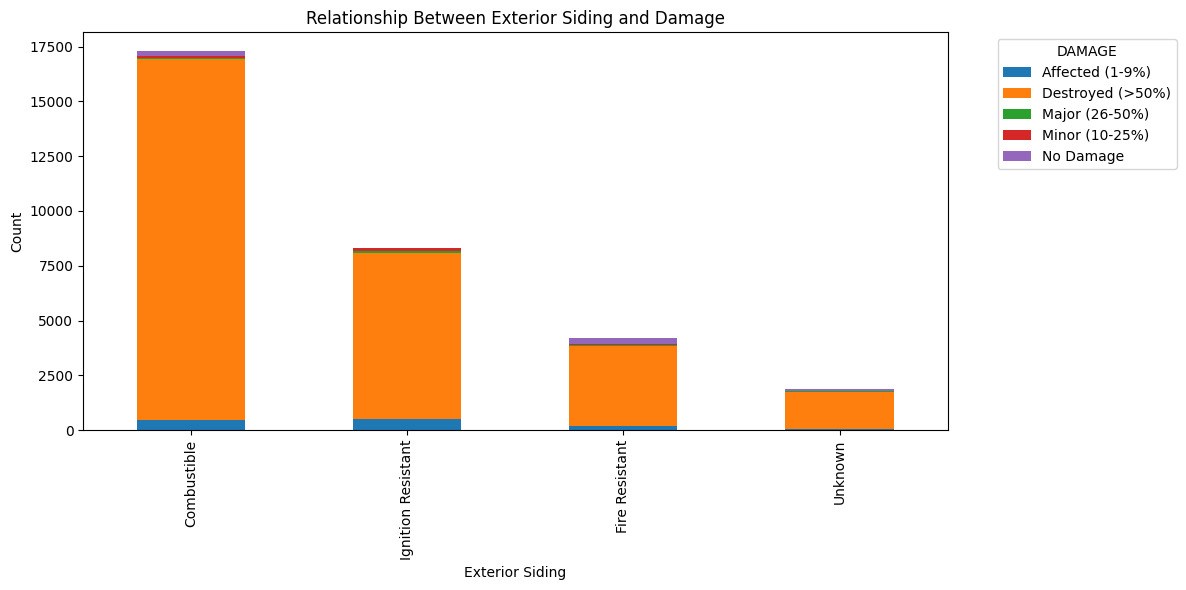

In [157]:
# Relationship between EXTERIORSI and DAMAGE
exteriorsi_damage = cali_wildfire_data.groupby(['EXTERIORSI', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False).fillna(0)
exteriorsi_damage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship Between Exterior Siding and Damage')
plt.ylabel('Count')
plt.xlabel('Exterior Siding')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



<a name="7.7"></a>
### 7.7 - Relationship of Topography with Damage 

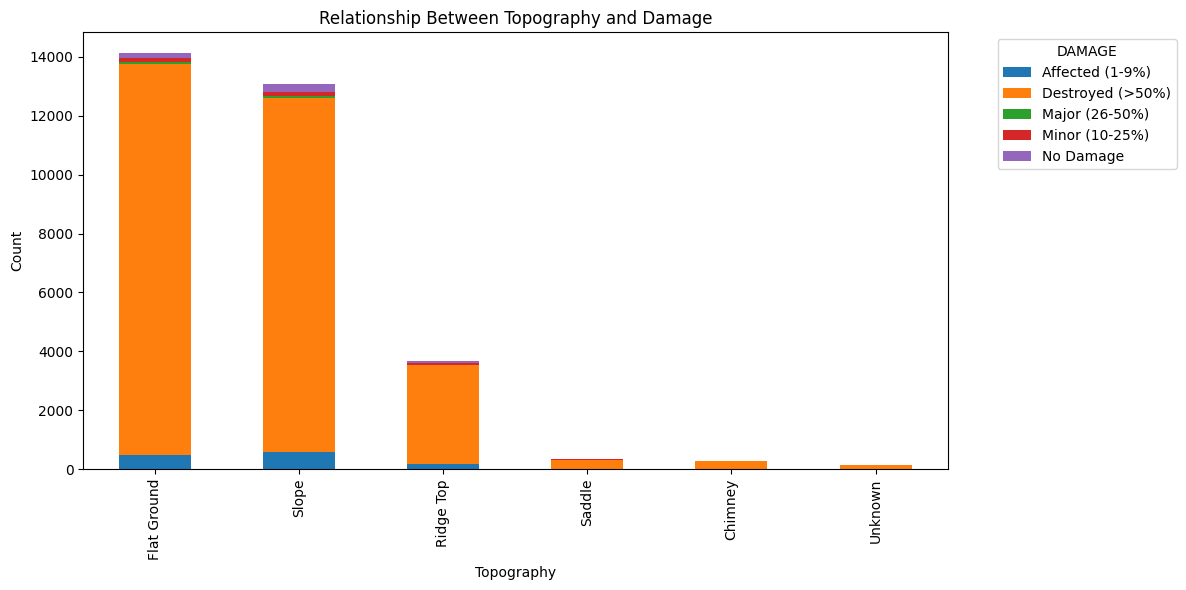

In [158]:
# Relationship between TOPOGRAPHY and DAMAGE
topography_damage = cali_wildfire_data.groupby(['TOPOGRAPHY', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False).fillna(0)
topography_damage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship Between Topography and Damage')
plt.ylabel('Count')
plt.xlabel('Topography')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<a name="7.8"></a>
### 7.8 - Relationship of WindowPane with Damage 

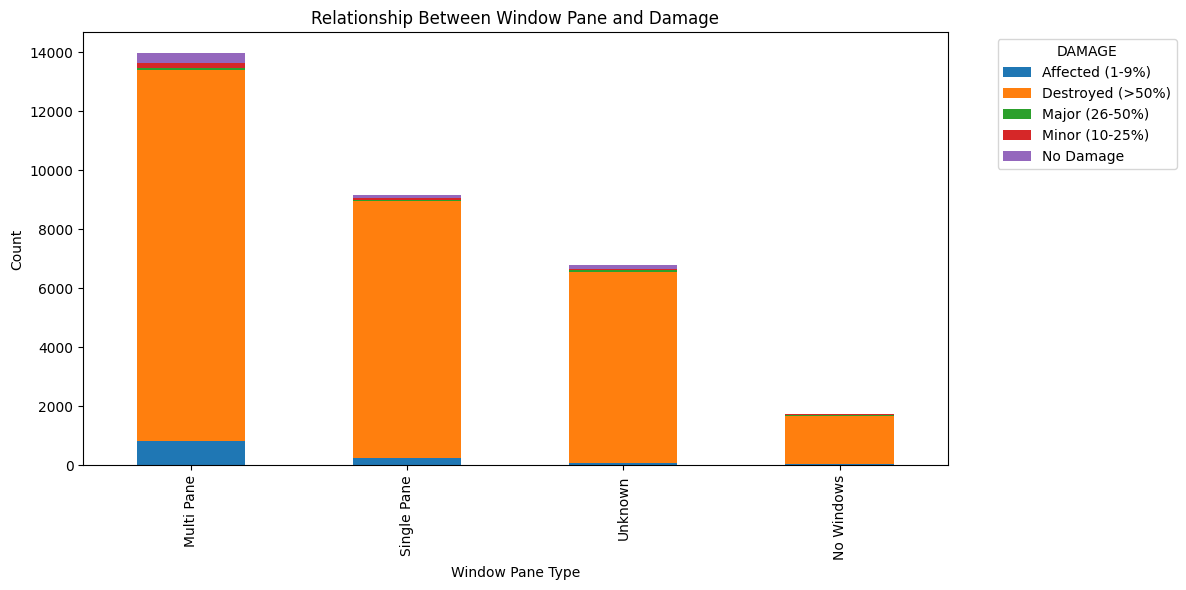

In [159]:
# Relationship between WINDOWPANE and DAMAGE
windowpane_damage = cali_wildfire_data.groupby(['WINDOWPANE', 'DAMAGE']).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False).fillna(0)
windowpane_damage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relationship Between Window Pane and Damage')
plt.ylabel('Count')
plt.xlabel('Window Pane Type')
plt.legend(title='DAMAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<a name="8"></a>
## 8 - Year Built with respect to DAMAGE

In [160]:
data = cali_wildfire_data.copy()

In [197]:
# Replace 'Unknown' and '0' with NaN
data['YEARBUILT'] = data['YEARBUILT'].replace(['Unknown', '0'], np.nan).astype(float)

# Confirm changes
data['YEARBUILT'].describe()


count    23222.000000
mean      1968.860090
std         34.414348
min          1.000000
25%       1956.000000
50%       1973.000000
75%       1984.000000
max       2018.000000
Name: YEARBUILT, dtype: float64

<a name="8.1"></a>
### 8.1 - BoxPlot Year and Damage

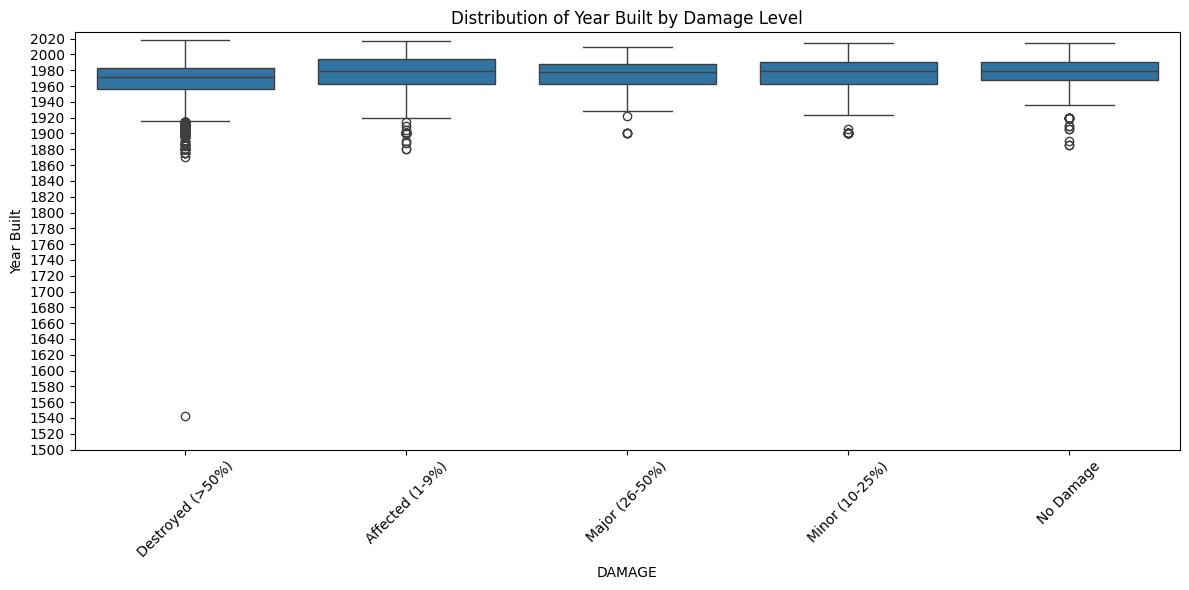

In [162]:
# Boxplot for YEARBUILT and DAMAGE after cleaning
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='DAMAGE', y='YEARBUILT')
plt.title('Distribution of Year Built by Damage Level')
plt.ylabel('Year Built')
plt.xticks(rotation=45)

# setting Y-axis
y_min = 1500
y_max = data['YEARBUILT'].max() + 10
y_ticks = np.arange(y_min, y_max + 1, 20)  # Set y-axis ticks every 50 years
plt.ylim(y_min, y_max)
plt.yticks(y_ticks)

# plt.ylim(1800, data['YEARBUILT'].max() + 10)  # Set y-axis range starting from 1500
plt.tight_layout()
plt.show()


In [163]:
# Perform grouping analysis and feature engineering

# 1. Grouping Analysis for Key Features
group_analysis = {}

# Categorical features: Analyze proportions of DAMAGE for each category
categorical_features = ['STRUCTURET_STANDARDIZED','ROOFCONSTR', 'VEGCLEARAN', 'TOPOGRAPHY', 'EXTERIORSI', 'VENTSCREEN', 'EAVES']
for feature in categorical_features:
    group_analysis[feature] = cali_wildfire_data.groupby(feature)['DAMAGE'].value_counts(normalize=True).unstack()

# Display group analysis results
for feature, group_data in group_analysis.items():
    print(f"\nAnalysis for {feature}:")
    print(group_data)


Analysis for STRUCTURET_STANDARDIZED:
DAMAGE                   Affected (1-9%)  Destroyed (>50%)  Major (26-50%)  \
STRUCTURET_STANDARDIZED                                                      
Commercial Building             0.108303          0.820698        0.015644   
Mixed Use                       0.111111          0.833333             NaN   
Mobile Home                     0.016258          0.979189        0.001517   
Multi Family Residence          0.067437          0.843931        0.021195   
Non-habitable                   0.036569          0.861037        0.013298   
Other                           0.025267          0.955834        0.007601   
Outbuilding                     0.038655          0.899160        0.014286   
Public Building                 0.107143          0.678571        0.021429   
Single Family Residence         0.045321          0.923205        0.002892   

DAMAGE                   Minor (10-25%)  No Damage  
STRUCTURET_STANDARDIZED                          

<a name="9"></a>
## 9 - GroupBy Analysis with respect to Damage

In [164]:
damage_analysis_wrt_structureType = cali_wildfire_data.groupby('STRUCTURET_STANDARDIZED')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_structureType

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
STRUCTURET_STANDARDIZED,,,,,
Single Family Residence,815.0,16602.0,52.0,158.0,356.0
Other,123.0,4653.0,37.0,48.0,7.0
Mobile Home,75.0,4517.0,7.0,11.0,3.0
Non-habitable,55.0,1295.0,20.0,34.0,100.0
Outbuilding,46.0,1070.0,17.0,16.0,41.0
Commercial Building,90.0,682.0,13.0,25.0,21.0
Multi Family Residence,35.0,438.0,11.0,12.0,23.0
Public Building,15.0,95.0,3.0,5.0,22.0
Mixed Use,2.0,15.0,NaN,1.0,NaN


In [201]:
damage_analysis_wrt_vegetation_clerance = cali_wildfire_data.groupby('VEGCLEARAN')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_vegetation_clerance

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
VEGCLEARAN,,,,,
0-30',871,22002,109,215,289
30-60',167,3230,23,40,70
Unknown,181,3038,20,39,123
>100',30,629,6,7,55
60-100',7,468,2,9,36


In [166]:
damage_analysis_wrt_roof = cali_wildfire_data.groupby('ROOFCONSTR')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_roof

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
ROOFCONSTR,,,,,
Asphalt,551.0,15871.0,24.0,65.0,NaN
Fire Resistant,355.0,7351.0,50.0,126.0,442.0
Metal,119.0,3037.0,24.0,55.0,NaN
Unknown,55.0,1598.0,14.0,9.0,76.0
Combustible,24.0,602.0,9.0,11.0,55.0
Tile,121.0,585.0,33.0,34.0,NaN
Wood,4.0,128.0,3.0,2.0,NaN
Other,14.0,101.0,2.0,1.0,NaN
Concrete,13.0,94.0,1.0,7.0,NaN


In [167]:
damage_analysis_wrt_windowPane = cali_wildfire_data.groupby('WINDOWPANE')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_windowPane

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
WINDOWPANE,,,,,
Multi Pane,829.0,12586.0,59.0,161.0,344.0
Single Pane,263.0,8694.0,33.0,85.0,91.0
Unknown,98.0,6470.0,46.0,35.0,138.0
No Windows,66.0,1617.0,22.0,29.0,NaN


In [168]:
damage_analysis_wrt_vent = cali_wildfire_data.groupby('VENTSCREEN')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_vent

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
VENTSCREEN,,,,,
Unknown,159.0,8893.0,55.0,66.0,247.0
"Mesh Screen > 1/8""",303.0,8735.0,11.0,37.0,NaN
"Mesh Screen <= 1/8""",263.0,4619.0,14.0,31.0,NaN
Yes,253.0,3820.0,18.0,69.0,285.0
No Vents,200.0,2632.0,50.0,75.0,NaN
Unscreened,37.0,415.0,2.0,9.0,NaN
No,41.0,253.0,10.0,23.0,41.0


In [169]:
damage_analysis_wrt_city = cali_wildfire_data.groupby('CITY')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_city

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
CITY,,,,,
Santa Rosa,189.0,5532.0,30.0,67.0,72.0
Magalia,66.0,2650.0,2.0,8.0,NaN
Paradise Northwest B,42.0,1725.0,1.0,8.0,NaN
Paradise Central Southwest B,47.0,1510.0,3.0,14.0,NaN
Paradise Central Southeast A,37.0,1466.0,1.0,6.0,NaN
...,...,...,...,...,...
Cherokee,NaN,NaN,NaN,1.0,NaN
Oakville,1.0,NaN,NaN,NaN,NaN
Ridge,NaN,NaN,NaN,1.0,NaN


In [170]:
damage_analysis_wrt_CaliFireUnit = cali_wildfire_data.groupby('CALFIREUNI')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_CaliFireUnit

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
CALFIREUNI,,,,,
BTU,603.0,19146.0,30.0,107.0,NaN
LNU,395.0,7980.0,59.0,125.0,573.0
VNC,237.0,1633.0,63.0,66.0,NaN
MEU,21.0,547.0,7.0,9.0,NaN
NEU,NaN,61.0,1.0,3.0,NaN


In [171]:
damage_analysis_wrt_County = cali_wildfire_data.groupby('COUNTY')['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_County

DAMAGE,Affected (1-9%),Destroyed (>50%),Major (26-50%),Minor (10-25%),No Damage
COUNTY,,,,,
Butte,599.0,18882.0,27.0,104.0,NaN
SON,279.0,6713.0,42.0,93.0,97.0
Los Angeles,165.0,1448.0,45.0,40.0,NaN
NAP,107.0,1099.0,15.0,32.0,436.0
Mendocino,21.0,541.0,7.0,9.0,NaN
YUB,4.0,264.0,3.0,3.0,NaN
Ventura,72.0,185.0,18.0,26.0,NaN
Lake,6.0,160.0,2.0,NaN,NaN
NEV,NaN,61.0,1.0,3.0,NaN


In [172]:
damage_analysis_wrt_roof_exterior = cali_wildfire_data.groupby(['ROOFCONSTR', 'EAVES',
    'EXTERIORSI'])['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_roof_exterior.head(10)

DAMAGE                                        Affected (1-9%)  \
ROOFCONSTR     EAVES      EXTERIORSI                            
Asphalt        Unenclosed Combustible                   175.0   
               Unknown    Combustible                    11.0   
Fire Resistant Unknown    Combustible                    12.0   
Asphalt        Unenclosed Ignition Resistant            175.0   
Fire Resistant Unknown    Fire Resistant                  8.0   
Asphalt        Unknown    Ignition Resistant              3.0   
Unknown        Unknown    Unknown                        39.0   
Asphalt        Enclosed   Combustible                    58.0   
                          Ignition Resistant            111.0   
Metal          No Eaves   Ignition Resistant             44.0   

DAMAGE                                        Destroyed (>50%)  \
ROOFCONSTR     EAVES      EXTERIORSI                             
Asphalt        Unenclosed Combustible                   5387.0   
               Unknown    Combustible                   3384.0   
Fire Resistant Unknown    Combustible                   2668.0   
Asphalt        Unenclosed Ignition Resistant            2641.0   
Fire Resistant Unknown    Fire Resistant                2230.0   
Asphalt        Unknown    Ignition Resistant            1846.0   
Unknown        Unknown    Unknown                       1149.0   
Asphalt        Enclosed   Combustible                   1083.0   
                          Ignition Resistant             759.0   
Metal          No Eaves   Ignition Resistant             597.0   

DAMAGE                                        Major (26-50%)  Minor (10-25%)  \
ROOFCONSTR     EAVES      EXTERIORSI                                           
Asphalt        Unenclosed Combustible                    5.0            13.0   
               Unknown    Combustible                    NaN             1.0   
Fire Resistant Unknown    Combustible                    2.0             4.0   
Asphalt        Unenclosed Ignition Resistant             4.0            30.0   
Fire Resistant Unknown    Fire Resistant                 4.0             5.0   
Asphalt        Unknown    Ignition Resistant             NaN             NaN   
Unknown        Unknown    Unknown                        8.0             6.0   
Asphalt        Enclosed   Combustible                    6.0             6.0   
                          Ignition Resistant             5.0            12.0   
Metal          No Eaves   Ignition Resistant            16.0            27.0   

DAMAGE                                        No Damage  
ROOFCONSTR     EAVES      EXTERIORSI                     
Asphalt        Unenclosed Combustible               NaN  
               Unknown    Combustible               NaN  
Fire Resistant Unknown    Combustible               8.0  
Asphalt        Unenclosed Ignition Resistant        NaN  
Fire Resistant Unknown    Fire Resistant            8.0  
Asphalt        Unknown    Ignition Resistant        NaN  
Unknown        Unknown    Unknown                  71.0  
Asphalt        Enclosed   Combustible               NaN  
                          Ignition Resistant        NaN  
Metal          No Eaves   Ignition Resistant        NaN

In [173]:
damage_analysis_wrt_house_attr = cali_wildfire_data.groupby(['VENTSCREEN', 'WINDOWPANE'])['DAMAGE'].value_counts().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)
damage_analysis_wrt_house_attr

DAMAGE                           Affected (1-9%)  Destroyed (>50%)  \
VENTSCREEN          WINDOWPANE                                       
Unknown             Unknown                 71.0            4949.0   
Mesh Screen > 1/8"  Multi Pane             227.0            4549.0   
                    Single Pane             67.0            3620.0   
Mesh Screen <= 1/8" Multi Pane             213.0            2848.0   
Yes                 Multi Pane             209.0            2397.0   
Unknown             Multi Pane              56.0            1994.0   
                    Single Pane             31.0            1700.0   
Mesh Screen <= 1/8" Single Pane             41.0            1348.0   
No Vents            Single Pane             55.0             961.0   
                    No Windows              43.0             883.0   
Yes                 Unknown                 11.0             716.0   
                    Single Pane             33.0             707.0   
No Vents            Multi Pane              96.0             672.0   
Mesh Screen > 1/8"  Unknown                  1.0             355.0   
Unscreened          Single Pane             17.0             266.0   
Unknown             No Windows               1.0             250.0   
Mesh Screen <= 1/8" No Windows               5.0             215.0   
Mesh Screen > 1/8"  No Windows               8.0             211.0   
Mesh Screen <= 1/8" Unknown                  4.0             208.0   
No Vents            Unknown                  6.0             116.0   
No                  Unknown                  5.0              97.0   
                    Single Pane             19.0              92.0   
                    Multi Pane              17.0              64.0   
Unscreened          Multi Pane              11.0              62.0   
                    No Windows               9.0              58.0   
                    Unknown                  NaN              29.0   

DAMAGE                           Major (26-50%)  Minor (10-25%)  No Damage  
VENTSCREEN          WINDOWPANE                                              
Unknown             Unknown                36.0            24.0      119.0  
Mesh Screen > 1/8"  Multi Pane              7.0            26.0        NaN  
                    Single Pane             4.0             9.0        NaN  
Mesh Screen <= 1/8" Multi Pane              9.0            22.0        NaN  
Yes                 Multi Pane             13.0            52.0      230.0  
Unknown             Multi Pane             12.0            20.0       93.0  
                    Single Pane             6.0            21.0       35.0  
Mesh Screen <= 1/8" Single Pane             5.0             7.0        NaN  
No Vents            Single Pane            10.0            25.0        NaN  
                    No Windows             20.0            25.0        NaN  
Yes                 Unknown                 1.0             2.0       11.0  
                    Single Pane             4.0            15.0       44.0  
No Vents            Multi Pane             16.0            24.0        NaN  
Mesh Screen > 1/8"  Unknown                 NaN             NaN        NaN  
Unscreened          Single Pane             1.0             3.0        NaN  
Unknown             No Windows              1.0             1.0        NaN  
Mesh Screen <= 1/8" No Windows              NaN             1.0        NaN  
Mesh Screen > 1/8"  No Windows              NaN             2.0        NaN  
Mesh Screen <= 1/8" Unknown                 NaN             1.0        NaN  
No Vents            Unknown                 4.0             1.0        NaN  
No                  Unknown                 5.0             7.0        8.0  
                    Single Pane             3.0             5.0       12.0  
                    Multi Pane              2.0            11.0       21.0  
Unscreened          Multi Pane              NaN             6.0        NaN  
                    No Windows       

<a name="10"></a>
## 10 - Feature Engineering 

In [174]:
cali_wildfire_data.head(2)

,DAMAGE,CITY,CALFIREUNI,COUNTY,COMMUNITY,INCIDENTNA,INCIDENTNU,INCIDENTST,VEGCLEARAN,STRUCTURET,...,VENTSCREEN,EXTERIORSI,WINDOWPANE,TOPOGRAPHY,ASSESSEDIM,YEARBUILT,LONGITUDE,LATITUDE,CLAIM,STRUCTURET_STANDARDIZED
0,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,11/8/2018,0-30',Mobile Home Double Wide,...,"Mesh Screen > 1/8""",Ignition Resistant,Single Pane,Flat Ground,2756731,1900,-121.590568,39.78265,629141.49,Mobile Home
1,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,11/8/2018,0-30',Mobile Home Double Wide,...,"Mesh Screen > 1/8""",Ignition Resistant,Multi Pane,Flat Ground,2756731,1900,-121.590352,39.78267,812980.07,Mobile Home


In [175]:
# Creating a Copy of Data for Feature Engineering
caliWildfire_feature_df = cali_wildfire_data.copy()

In [176]:
# 2. Feature Engineering

# Calculate Building Age (Max Year = 2018)
# caliWildfire_feature_df['BUILDING_AGE'] = 2018 - pd.to_numeric(caliWildfire_feature_df['YEARBUILT'], errors='coerce')# Recalculate BUILDING_AGE, keeping "Unknown" as is
caliWildfire_feature_df['BUILDING_AGE'] = caliWildfire_feature_df['YEARBUILT'].apply(lambda x: np.nan if x in ['Unknown','0', '1'] else (2018 - int(x)))


# Verify the updated BUILDING_AGE column
caliWildfire_feature_df['BUILDING_AGE'].unique()


array([118.,  67.,  78.,  56.,  51.,  48.,  43.,  71.,  47.,   2.,  69.,
        39.,  44.,  31.,  46.,  37.,  11.,  70.,   5.,  60.,  66.,  19.,
        34.,  58.,  38.,  72.,  15.,  55.,  41.,  16.,  40.,  33.,  30.,
        27.,  45.,  42.,  28.,  20.,  35.,   4.,  64.,  24.,  91.,  21.,
        65.,  52.,  54.,  32.,  62.,  50.,  53.,  nan,   1.,   6.,   3.,
         8.,  17.,  18.,  26.,  63.,  68.,  76.,  81.,  59.,  77.,  10.,
        80.,  83.,  74.,  75.,  14.,  61.,  86.,  73.,  82.,  49.,  57.,
        29.,  22.,   7.,  36.,  98.,  23.,  79.,  13.,  25.,  88.,  12.,
         9.,   0., 103.,  84.,  93.,  87., 108., 104.,  90.,  97.,  85.,
       101.,  95.,  96., 117.,  92., 106.,  99., 113.,  94., 111.,  89.,
       475., 133., 123., 138., 112., 134., 116., 114., 115., 102., 128.,
       130., 122., 120., 143., 100., 148.])

In [177]:
# Create binary vegetation clearance features
caliWildfire_feature_df['LOW_VEGETATION_CLEARANCE'] = (caliWildfire_feature_df['VEGCLEARAN'] == "0-30'").astype(int)
caliWildfire_feature_df['MEDIUM_VEGETATION_CLEARANCE'] = caliWildfire_feature_df['VEGCLEARAN'].isin(["30-60'", "60-100'"]).astype(int)
caliWildfire_feature_df['HIGH_VEGETATION_CLEARANCE'] = (caliWildfire_feature_df['VEGCLEARAN'] == ">100'").astype(int)


In [178]:
# Simplify Roof Type categories (example: Vulnerable/Resistant)
vulnerable_roof = ['Combustible', 'Unknown']
caliWildfire_feature_df['ROOF_VULNERABILITY'] = caliWildfire_feature_df['ROOFCONSTR'].isin(vulnerable_roof).astype(int)

# Damage Cost Ratio
caliWildfire_feature_df['DAMAGE_COST_RATIO'] = caliWildfire_feature_df['CLAIM'] / caliWildfire_feature_df['ASSESSEDIM']


In [179]:
# Interaction Terms
caliWildfire_feature_df['BUILDING_AGE_VEG_LOW'] = caliWildfire_feature_df['BUILDING_AGE'] * caliWildfire_feature_df['LOW_VEGETATION_CLEARANCE']
caliWildfire_feature_df['BUILDING_AGE_VEG_MEDIUM'] = caliWildfire_feature_df['BUILDING_AGE'] * caliWildfire_feature_df['MEDIUM_VEGETATION_CLEARANCE']

In [180]:
caliWildfire_feature_df.head(2)

,DAMAGE,CITY,CALFIREUNI,COUNTY,COMMUNITY,INCIDENTNA,INCIDENTNU,INCIDENTST,VEGCLEARAN,STRUCTURET,...,CLAIM,STRUCTURET_STANDARDIZED,BUILDING_AGE,LOW_VEGETATION_CLEARANCE,MEDIUM_VEGETATION_CLEARANCE,HIGH_VEGETATION_CLEARANCE,ROOF_VULNERABILITY,DAMAGE_COST_RATIO,BUILDING_AGE_VEG_LOW,BUILDING_AGE_VEG_MEDIUM
0,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,11/8/2018,0-30',Mobile Home Double Wide,...,629141.49,Mobile Home,118.0,1,0,0,0,0.228220,118.0,0.0
1,Destroyed (>50%),Paradise Northwest A,BTU,Butte,Paradise,Camp,CA-BTU-016737,11/8/2018,0-30',Mobile Home Double Wide,...,812980.07,Mobile Home,118.0,1,0,0,0,0.294907,118.0,0.0


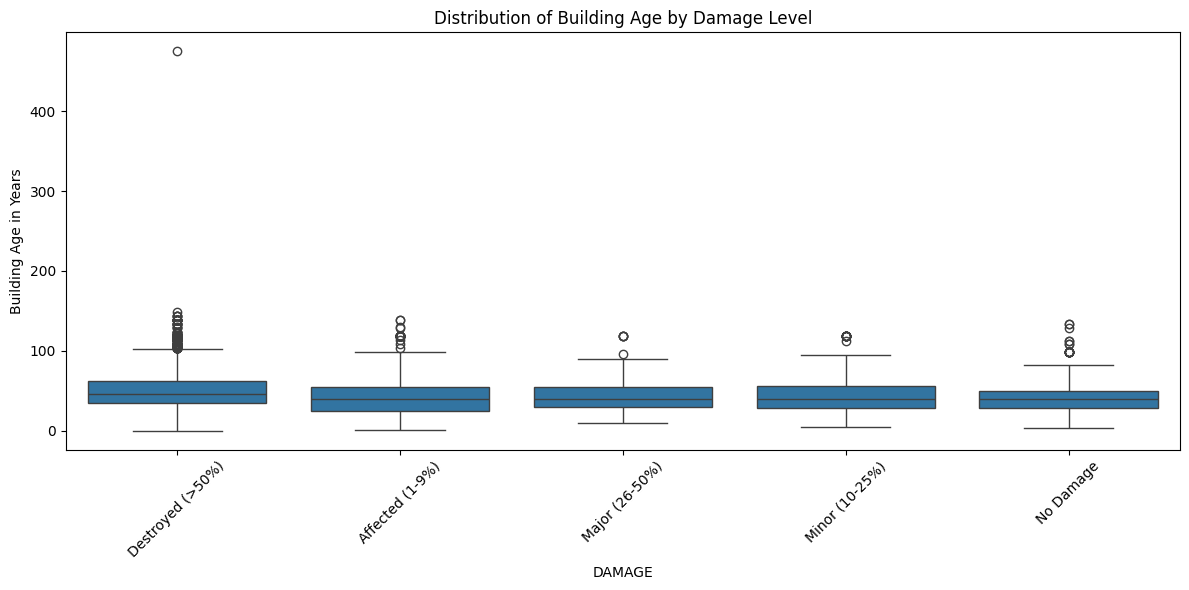

In [181]:
# 3. Relationship between YEARBUILT and DAMAGE
plt.figure(figsize=(12, 6))
sns.boxplot(data=caliWildfire_feature_df, x='DAMAGE', y='BUILDING_AGE')
plt.title('Distribution of Building Age by Damage Level')
plt.ylabel('Building Age in Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



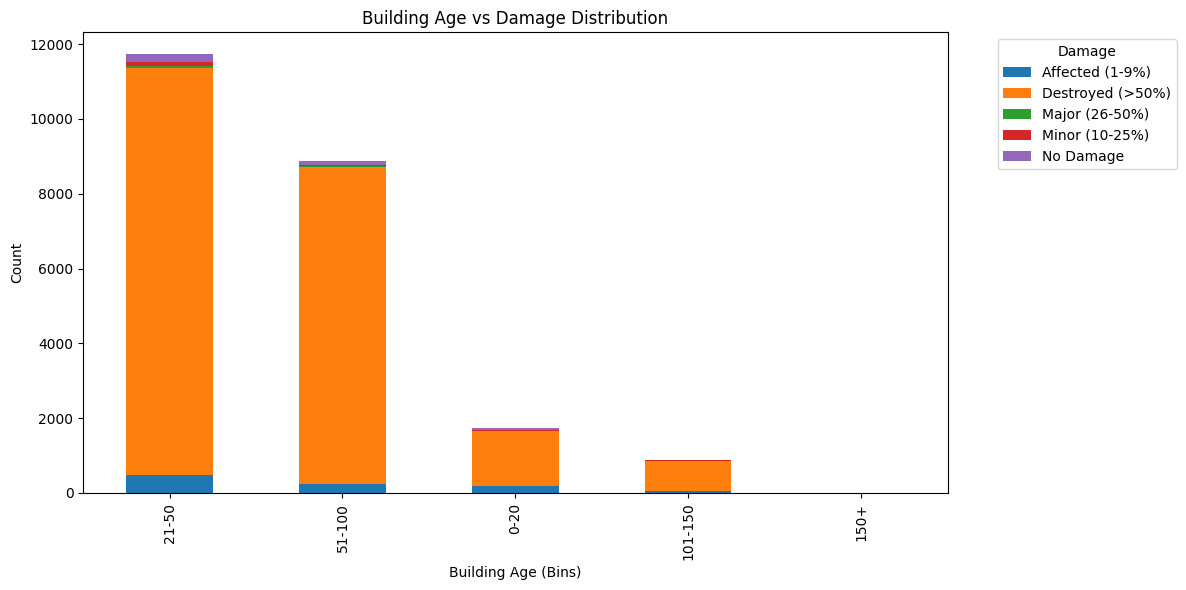

In [182]:
# Creating bins for Building Age for visualization
caliWildfire_feature_df['BUILDING_AGE_BIN'] = pd.cut(caliWildfire_feature_df['BUILDING_AGE'], bins=[0, 20, 50, 100, 150, np.inf],
                                                     labels=['0-20', '21-50', '51-100', '101-150', '150+'], right=False)

# Bar plot for Building Age and Damage
age_damage_counts = caliWildfire_feature_df.groupby(by = ['BUILDING_AGE_BIN', 'DAMAGE'], observed=False).size().unstack().sort_values(by = ['Destroyed (>50%)'], ascending=False)


# Plot the distribution
age_damage_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Building Age vs Damage Distribution')
plt.xlabel('Building Age (Bins)')
plt.ylabel('Count')
plt.legend(title='Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [183]:
caliWildfire_feature_df['INCIDENTST'].unique()

array(['11/8/2018', '11/08/2018', '10/08/2017', '10/09/2017',
       '10/27/2017', '10/8/2017'], dtype=object)

In [184]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['quarter'] = df['INCIDENTST'].dt.quarter
    df['month'] = df['INCIDENTST'].dt.month
    df['year'] = df['INCIDENTST'].dt.year
    X = df[['quarter','month','year']]
    if label:
        y = df[label]
        return X, y
    return X

In [185]:
df1 = caliWildfire_feature_df.copy()

# Convert INCIDENTST to datetime format
df1['INCIDENTST'] = pd.to_datetime(df1['INCIDENTST'])
# cali_wildfire_data['INCIDENTST'] = pd.to_datetime(cali_wildfire_data['INCIDENTST'], errors='coerce')
# caliWildfire_feature_df['INCIDENTST'] = pd.to_datetime(caliWildfire_feature_df['INCIDENTST'], errors = 'coerce')



In [186]:

df1['INCIDENTST'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 31666 entries, 0 to 31665
Series name: INCIDENTST
Non-Null Count  Dtype         
--------------  -----         
31666 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 247.5 KB


In [187]:
create_features(df1)

,quarter,month,year
0,4,11,2018
1,4,11,2018
2,4,11,2018
3,4,11,2018
4,4,11,2018
...,...,...,...
31661,4,10,2017
31662,4,10,2017
31663,4,10,2017
31664,4,10,2017


In [188]:
caliWildfire_feature_df['BUILDING_AGE'].isna().sum()

8448

In [189]:
caliWildfire_feature_df['INCIDENTST'].unique()

array(['11/8/2018', '11/08/2018', '10/08/2017', '10/09/2017',
       '10/27/2017', '10/8/2017'], dtype=object)

In [190]:
df1['BUILDING_AGE'].isna().value_counts()

BUILDING_AGE
False    23218
True      8448
Name: count, dtype: int64

<a name="11"></a>
## 11 - Exporting the feature dataframe for model training

In [196]:
import os

csv_folder = 'csv_data'
if not os.path.exists(csv_folder):
    os.makedirs(csv_folder)

# Define the path for the CSV file
csv_file_path = os.path.join(csv_folder, 'cali_wildfire_cleaned_with_feature_columns.csv')

# Write the DataFrame to a CSV file
df1.to_csv(csv_file_path, index=False)